In [1]:
# # importing scikit learn with make_blobs
# from sklearn.datasets import make_blobs
  
# # creating datasets X containing n_samples
# # Y containing two classes
# X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40)
# import matplotlib.pyplot as plt
# # plotting scatters 
# plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
# plt.show()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import cvxopt

In [3]:
# class SVM:
#     def fit(self, X, y):
#         n_samples, n_features = X.shape
# # P = X^T X
#         K = np.zeros((n_samples, n_samples))
#         for i in range(n_samples):
#             for j in range(n_samples):
#                 K[i,j] = np.dot(X[i], X[j])
#         P = cvxopt.matrix(np.outer(y, y) * K)
#         # q = -1 (1xN)
#         q = cvxopt.matrix(np.ones(n_samples) * -1)
#         # A = y^T 
#         A = cvxopt.matrix(y, (1, n_samples))
#         # b = 0 
#         b = cvxopt.matrix(0.0)
#         # -1 (NxN)
#         G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
#         # 0 (1xN)
#         h = cvxopt.matrix(np.zeros(n_samples))
#         solution = cvxopt.solvers.qp(P, q, G, h, A, b)
#         # Lagrange multipliers
#         a = np.ravel(solution['x'])
#         # Lagrange have non zero lagrange multipliers
#         sv = a > 1e-5
#         ind = np.arange(len(a))[sv]
#         self.a = a[sv]
#         self.sv = X[sv]
#         self.sv_y = y[sv]
#         # Intercept
#         self.b = 0
#         for n in range(len(self.a)):
#             self.b += self.sv_y[n]
#             self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
#         self.b /= len(self.a)
#         # Weights
#         self.w = np.zeros(n_features)
#         for n in range(len(self.a)):
#             self.w += self.a[n] * self.sv_y[n] * self.sv[n]

#     def project(self, X):
#         return np.dot(X, self.w) + self.b


#     def predict(self, X):
#         return np.sign(self.project(X))

In [4]:
def svm(X, Y, c):
    m = len(X)
    P = matrix(np.dot(Y, Y.T) * np.dot(X, X.T))
    q = matrix(np.ones(m) * -1)
    g1 = np.asarray(np.diag(np.ones(m) * -1))
    g2 = np.asarray(np.diag(np.ones(m)))
    G = matrix(np.append(g1, g2, axis=0))
    h = matrix(np.append(np.zeros(m), (np.ones(m) * c), axis =0))
    A = np.reshape((Y.T), (1,m))
    b = matrix([0])

    print (A).shape

    A = matrix(A)
    A = A.astype('float')
    
    sol = solvers.qp(P, q, G, h, A, b)
    print(sol)

In [5]:

X = np.random.uniform(-1, 10, size = (200,2));
np.random.seed(0)

n1,n2 = 100,100
n = n1+n2

X1 = np.random.normal([4,6], 0.5, (n1, 2))
X2 = np.random.normal([-1,1], 0.5, (n2, 2))

X = np.concatenate((X1,X2))
np.random.shuffle(X)

Y = 1*np.logical_xor(X[:, 0] > 0 , X[:, 1] > 0)
Y[Y==0] = -1

noiseLevel = 0.6
noise = noiseLevel * np.random.randn(n, 2)
X +=noise 

In [6]:
df_dict = {"X1":X[:,0], "X2":X[:,1],"Y":Y}

df = pd.DataFrame(df_dict)
df.head()

,X1,X2,Y
0,5.107011,4.854087,-1
1,-0.930363,-0.050416,1
2,4.001498,6.351039,-1
3,2.997893,5.496348,-1
4,4.593971,5.073170,-1


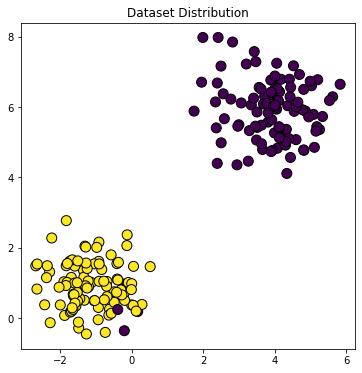

In [7]:
plt.figure(1, figsize=(6,6)) 
plt.title('Dataset Distribution')
plt.scatter(X[:, 0], X[:, 1], s=100, c=Y, edgecolors='k')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [8]:
# #find best degree

# kfold=10
# best_degree = 1
# best_score = 0
# scores = []

# for i in range(1,10):
#     svm_classifier = SVC(kernel="poly",degree=i)
#     svmScores = cross_val_score(svm_classifier, X, Y.ravel(), cv=kfold, scoring="accuracy")
#     score = statistics.mean(svmScores)
#     scores.append(score)
    
#     if score > best_score:
#         best_score=score
#         best_degree=i
#     print('Average accuracy in 10- fold cross-validation for SVM with degree',i , ' is ', score)

# print("\n\nBest degree is",best_degree," with score ",best_score)

In [9]:
# #find optimum C

# scores = []
# best_C = 1
# best_score = 0
# rangeC = 1000
# for c in range(1,rangeC):
#     svm_classifier = SVC(kernel="poly",degree=best_degree,C=c/100)
#     svmScores = cross_val_score(svm_classifier, X, Y.ravel(), cv=kfold, scoring="accuracy")
#     score = statistics.mean(svmScores)
#     scores.append(score)
#     if score > best_score:
#         best_score=score
#         best_C=c/100
#     #print('Average accuracy in 10- fold cross-validation for SVM with degree',best_degree ,"and C",c, ' is ', score)

# print("\n\nBest C is",best_C," with score ",best_score)

In [10]:
# svm_classifier = SVC(kernel="poly",degree=best_degree,C=best_C)
# svm_classifier.fit(X,Y)
# Y_hat = svm_classifier.predict(X)
# print(classification_report(Y,Y_hat))

NameError: name 'Y_hat' is not defined

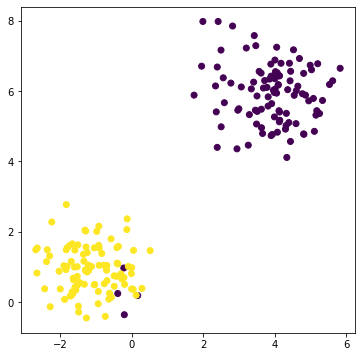

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))

squareSpace = 8
xx, yy = np.meshgrid(np.linspace(-squareSpace, squareSpace, 500), np.linspace(-squareSpace, squareSpace, 500))
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Plot the dataset
ax.scatter(X[:,0], X[:,1], c=Y)

#show misclassification
wrong = (Y == Y_hat)
wrong = X[wrong==False]
ax.scatter(wrong[:,0], wrong[:,1], s=15,alpha = 1, linewidth=1, facecolors='red', edgecolors='k', label="misclassification")

# Get the separating hyperplane
Z = svm_classifier.decision_function(xy).reshape(xx.shape)

# Draw the decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

support_vecX1 = svm_classifier.support_vectors_[:, 0]
support_vecX2 = svm_classifier.support_vectors_[:, 1]
# Highlight support vectors with a circle around them
ax.scatter(support_vecX1, support_vecX2, s=100, linewidth=1, facecolors='none', edgecolors='k',label='(highlighted)support vectors')
plt.legend()
plt.title("Misclasifications(Red Marked), Support Vectors and Classifier Function",fontsize=18)
plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [ ]:
svm = SVM()
svm.fit(X, Y)

In [ ]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Wistia')
# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k');
# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--');
# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--');

In [ ]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Wistia');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy);
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--');
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--');